In [32]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# Read customer_data.csv,internet_data.csv,churn_data.csv datafile in python notebook as dataframe.

In [2]:
customer_df = pd.read_csv('customer_data.csv')
internet_df = pd.read_csv('internet_data.csv')
churn_df = pd.read_csv('churn_data.csv')

# Checking the datatypes of the attributes in customer_df.

In [3]:
customer_df.dtypes

customerID       object
gender           object
SeniorCitizen     int64
Partner          object
Dependents       object
dtype: object

# Checking the datatypes of the attributes in internet_df.

In [4]:
internet_df.dtypes

customerID          object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
dtype: object

# Checking the datatypes of the attributes in internet_df.

In [5]:
churn_df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Converting the total charges to numeric data type.

In [6]:

churn_df.TotalCharges = pd.to_numeric(churn_df.TotalCharges, errors='coerce')
churn_df.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Checking count of null values in each attributes of customer_df.

In [7]:
customer_df.isnull().sum()


customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

# Checking count of null values in each attributes of internet_df.

In [8]:
internet_df.isnull().sum()


customerID          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

# Checking count of null values in each attributes of churn_df and we found that there are 11 null values in TotalCharges attribute.

In [9]:
churn_df.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Merging customer_df and internet_df using inner join on customerID and checking if both dataframes are merged.

In [10]:
temp = pd.merge(customer_df, internet_df,how='inner',on=['customerID'])
temp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


# Merging temp and churn_df using inner join on customerID and checking if both dataframes are merged.

In [11]:
customer_churn = pd.merge(temp, churn_df,how='inner',on=['customerID'])
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,...,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,...,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,...,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,...,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,...,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# After merging we are checking the datatype of all columns in the merged dataframe.

In [12]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), ob

# First we are dropping the rows containing null values.Then, we are dropping the customerID column from the dataframe.

In [13]:
customer_churn.dropna(inplace = True)
customer_churn_df = customer_churn.drop(columns = ['customerID'])
customer_churn_df.head()


,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Converting the dependent variable to numeric values and all the categorical variables to dummy variables.

In [14]:
customer_churn_df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
customer_churn_df['Churn'].replace(to_replace='No',  value=0, inplace=True)

churn_df = pd.get_dummies(customer_churn_df)
churn_df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,1,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,1,1,0,0,0,1,0,0,1,0


# Using heatmap to display confusion matrix for logistic regression.

Text(42,0.5,'Truth')

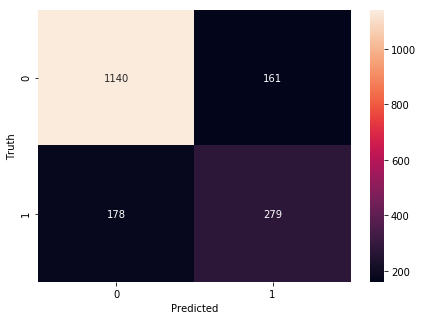

In [21]:

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ROC curve for Logistic Regression.

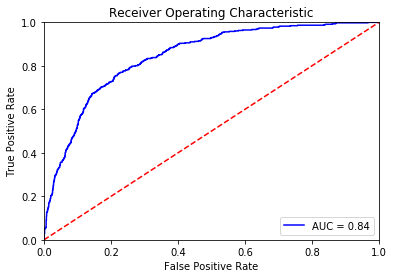

In [22]:
probs = logReg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Using Random Forest to find the accuracy on training and testing set.

In [23]:
ranForest= RandomForestClassifier(n_estimators=20)
ranForest.fit(X_train, y_train)
prediction_ranForest = ranForest.predict(X_test)


print('Accuracy of Random Forest model on training set: {:.2f}'
     .format(ranForest.score(X_train, y_train)))
print('Accuracy of Random Forest model on test set: {:.2f}'
     .format(ranForest.score(X_test, y_test)))

Accuracy of Random Forest model on training set: 0.99
Accuracy of Random Forest model on test set: 0.78


# Correcting the overfitting in Random Forest

In [27]:
ranForest1= RandomForestClassifier(n_estimators=50 ,
                                   max_features = "auto", max_leaf_nodes = 10, 
                                  random_state =25)
ranForest1.fit(X_train, y_train)
prediction_ranForest1 = ranForest1.predict(X_test)
cm_rf = metrics.confusion_matrix(y_test, prediction_ranForest1)

print('Accuracy of Random Forest model on training set: {:.2f}'
     .format(ranForest1.score(X_train, y_train)))
print('Accuracy of Random Forest model on test set: {:.2f}'
     .format(ranForest1.score(X_test, y_test)))

Accuracy of Random Forest model on training set: 0.80
Accuracy of Random Forest model on test set: 0.80


# Using heatmap to display confusion matrix for random forest.

Text(42,0.5,'Truth')

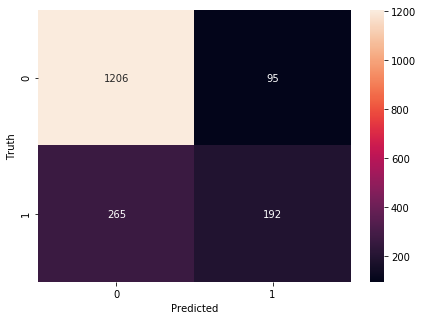

In [28]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_rf, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')